Import required libraries

In [1]:
#pip install seaborn
#pip install plotly
#pip install folium
#pip install awoc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import folium
import awoc

### Parsing datasets

In [3]:
airport_row = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', 
                          names=['Airport_ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude',
                                  'Timezone', 'DST', 'Tz_database_time_zone', 'Type', 'Source'])


rout_row = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat', 
                       names=['Airline', 'Airline_ID', 'Source_airport', 'Source_airport_ID', 'Destination_airport',
                             'Destination_airport_ID', 'Codeshare', 'Stops', 'Equipment'])

### Let's take a look at the structure of data frames

In [4]:
display(airport_row.head())
display(rout_row.head())

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


,Airline,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [5]:
airport_row.describe()

,Airport_ID,Latitude,Longitude,Altitude
count,7698.000000,7698.000000,7698.000000,7698.000000
mean,5170.950117,25.808442,-1.390546,1015.873344
std,3777.259930,28.404946,86.519162,1628.775132
min,1.000000,-90.000000,-179.876999,-1266.000000
25%,1993.250000,6.907983,-78.974699,63.000000
50%,4068.000000,34.085701,6.375653,352.000000
75%,7728.750000,47.239551,56.000599,1203.000000
max,14110.000000,89.500000,179.951004,14472.000000


In [6]:
airport_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airport_ID             7698 non-null   int64  
 1   Name                   7698 non-null   object 
 2   City                   7649 non-null   object 
 3   Country                7698 non-null   object 
 4   IATA                   7698 non-null   object 
 5   ICAO                   7698 non-null   object 
 6   Latitude               7698 non-null   float64
 7   Longitude              7698 non-null   float64
 8   Altitude               7698 non-null   int64  
 9   Timezone               7698 non-null   object 
 10  DST                    7698 non-null   object 
 11  Tz_database_time_zone  7698 non-null   object 
 12  Type                   7698 non-null   object 
 13  Source                 7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+

### Let's take a closer look at the composition of the columns and the values they store

In [7]:
display(len(airport_row))
display(len(airport_row.drop_duplicates()))
airport_row.drop_duplicates(inplace=True)

7698

7698

In [8]:
airport_row['IATA'].value_counts()

\N     1626
GKA       1
REY       1
PUR       1
GYA       1
       ... 
GPS       1
CUE       1
OCC       1
ATF       1
CPO       1
Name: IATA, Length: 6073, dtype: int64

In [9]:
#airport_row['IATA'] = airport_row['IATA'].replace('\N', np.NaN)  #<- won't work!
airport_row['IATA'] = airport_row['IATA'].replace('\\N', np.NaN)
airport_row['IATA'].value_counts()

GKA    1
ESM    1
PUR    1
GYA    1
EYP    1
      ..
GPS    1
CUE    1
OCC    1
ATF    1
CPO    1
Name: IATA, Length: 6072, dtype: int64

### Now we have reliable info about NaN in the IATA column

In [10]:
airport_row.isna().sum()

Airport_ID                  0
Name                        0
City                       49
Country                     0
IATA                     1626
ICAO                        0
Latitude                    0
Longitude                   0
Altitude                    0
Timezone                    0
DST                         0
Tz_database_time_zone       0
Type                        0
Source                      0
dtype: int64

In [11]:
airport_row.columns

Index(['Airport_ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz_database_time_zone',
       'Type', 'Source'],
      dtype='object')

In [12]:
airport_row.head()

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [13]:
airport_row[airport_row.City.isna()]

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source
7031,11794,Minsk Mazowiecki Military Air Base,NaN,Poland,NaN,EPMM,52.195499,21.655899,604,\N,\N,\N,airport,OurAirports
7032,11795,Powidz Military Air Base,NaN,Poland,NaN,EPPW,52.379398,17.853901,371,\N,\N,\N,airport,OurAirports
7137,11900,King Salman Abdulaziz Airport,NaN,Saudi Arabia,DWD,OEDM,24.449900,44.121201,3026,\N,\N,\N,airport,OurAirports
7138,11901,King Khaled Air Base,NaN,Saudi Arabia,KMX,OEKM,18.297300,42.803501,6778,\N,\N,\N,airport,OurAirports
7158,11921,Asahikawa Airfield,NaN,Japan,NaN,RJCA,43.794734,142.365432,377,\N,\N,\N,airport,OurAirports
7160,11923,Utsunomiya Airport,NaN,Japan,NaN,RJTU,36.514500,139.871010,334,\N,\N,\N,airport,OurAirports
7161,11924,Jungwon Air Base/Chungju Airport,NaN,South Korea,NaN,RKTI,37.030240,127.886353,281,\N,\N,\N,airport,OurAirports
7164,11927,Bislig Airport,NaN,Philippines,BPH,RPMF,8.195950,126.321999,12,\N,\N,\N,airport,OurAirports
7165,11928,Mati National Airport,NaN,Philippines,MXI,RPMQ,6.949091,126.273680,156,\N,\N,\N,airport,OurAirports
7184,11947,Metropolitano Airport,NaN,Venezuela,NaN,SVMP,10.133169,-66.787827,574,\N,\N,\N,airport,OurAirports


### Distribution of data in numeric columns, and do I even need to look??

In [14]:
def plot_hists_for_any_df(df):
    
    #Исключаем колонки с типом object
    numeric_columns = df.select_dtypes(include=['number'])

    # Количество графиков
    num_plots = len(numeric_columns.columns)

    if num_plots < 1:
        return 'Невозможно нарисовать ни одной гистограммы'
    else:
        # Количество строк и столбцов для размещения графиков
        num_rows = (num_plots - 1) // 3 + 1
        num_cols = 3

        fig, axes = plt.subplots(nrows=max(2, num_rows), ncols=num_cols, figsize=(15, 5 * (numeric_columns.shape[1] // 3 + 1)))
        fig.subplots_adjust(hspace=0.5)

        # Цвета для заголовков
        colors = ['blue', 'green', 'red']

        for i, col in enumerate(numeric_columns.columns):
            ax = axes[i // 3, i % 3]

            # Правило Скотта для определения количества бинов
            if df[col].nunique() > 1:
                data_range = df[col].max() - df[col].min()
                std_dev = df[col].std()
                bin_width = 3.5 * std_dev / (len(df[col]) ** (1/3))
                num_bins = int(np.ceil(data_range / bin_width))
            else:
                num_bins = 1

            #Устанавливаем толщину контура бинов в зависимости от их кол-ва (мб, можно еще лучше допилить)
            edge_thickness = 0.0015 * num_bins

            ax.hist(df[col], bins=num_bins, color='skyblue', edgecolor='black', linewidth=edge_thickness)
            ax.set_title(col, color=colors[i % 3])
            ax.set_xlabel('Значение')
            ax.set_ylabel('Частота')

        # Убираем лишние оси и заголовки (необходимо, если число графиков в строке <3)
        for i in range(num_plots, len(axes.flatten())):
            fig.delaxes(axes[i // 3, i % 3])

        plt.show();

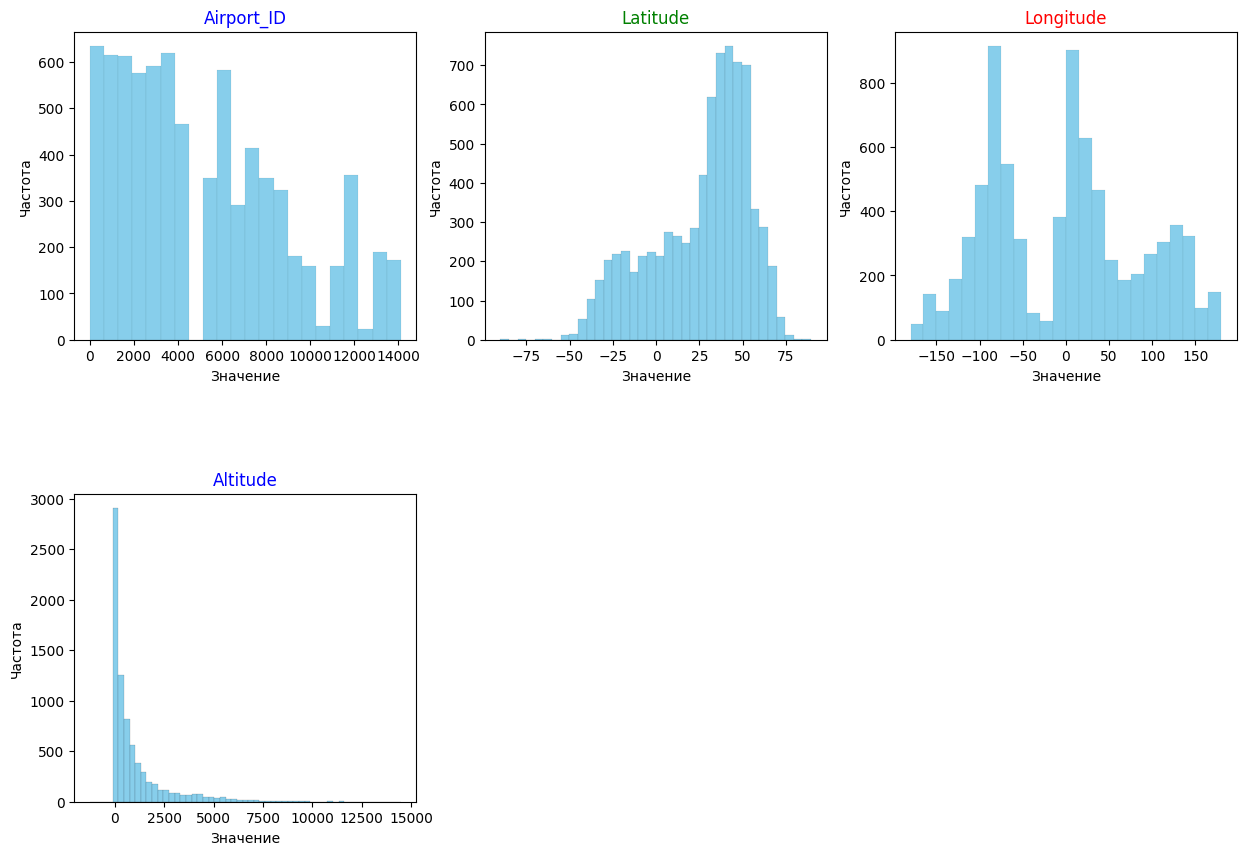

In [15]:
plot_hists_for_any_df(airport_row)

### Since the 'Airline' column stores exactly the 2-character IATA identifiers (this corresponds to the definition of the available data in the columns on the site from which the data was taken!), we delete the rows that contain len(Airline) != 2

In [16]:
rout_row = rout_row[rout_row['Airline'].apply(lambda x:len(x) == 2)]
display(rout_row.shape)
rout_row.head()

(67290, 9)

,Airline,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


### Count the number of arrivals and departures for each airport

In [17]:
#First merge by Destination_airport and count the number of arrivals for each airport
merge_table = pd.merge(airport_row, rout_row, left_on='IATA', right_on='Destination_airport', how='inner')
dest_count = merge_table.groupby(['Country', 'IATA', 'Name']).Destination_airport.value_counts().reset_index(level='Destination_airport', drop=True)

#Then do the same, but by Source_airport.
merge_table = pd.merge(airport_row, rout_row, left_on='IATA', right_on='Source_airport', how='inner')
source_count = merge_table.groupby(['Country', 'IATA', 'Name']).Source_airport.value_counts().reset_index(level='Source_airport', drop=True)

#Combine the obtained results into one table, filling with zeros those values that are equal to NaN (this appeared due to 
    # the fact that perhaps from the airport, let's say, there was a departure, but no arrivals (or vice versa)).
prepared_ans = pd.concat([source_count, dest_count], axis=1).fillna(value=0).astype(int)
prepared_ans

Source_airport  \
Country       IATA Name                                                         
Afghanistan   HEA  Herat Airport                                            6   
              KBL  Hamid Karzai International Airport                      28   
              KDH  Kandahar Airport                                         5   
              MZR  Mazar I Sharif Airport                                   4   
Albania       TIA  Tirana International Airport Mother Teresa              36   
...                                                                       ...   
Greece        KZI  Filippos Airport                                         0   
Honduras      UII  Utila Airport                                            0   
Mongolia      DLZ  Dalanzadgad Airport                                      0   
United States KYK  Karluk Airport                                           0   
              SPI  Abraham Lincoln Capital Airport                          0   

                                                               Destination_airport  
Country       IATA Name                                                             
Afghanistan   HEA  Herat Airport                                                 6  
              KBL  Hamid Karzai International Airport                           26  
              KDH  Kandahar Airport                                              5  
              MZR  Mazar I Sharif Airport                                        4  
Albania       TIA  Tirana International Airport Mother Teresa                   36  
...                                                                            ...  
Greece        KZI  Filippos Airport                                              1  
Honduras      UII  Utila Airport                                                 1  
Mongolia      DLZ  Dalanzadgad Airport                                           1  
United States KYK  Karluk Airport                                                1  
              SPI  Abraham Lincoln Capital Airport                               5  

[3249 rows x 2 columns]

### Сalculate the sum of the number of departures and arrivals for each IATA code and derive the top 10 (according to the max amount of such sum).

In [18]:
prepared_ans['Total_departure_arrival'] = prepared_ans.Source_airport + prepared_ans.Destination_airport
answer_1 = prepared_ans[['Source_airport', 'Destination_airport', 'Total_departure_arrival']].nlargest(10, 'Total_departure_arrival').reset_index(level='IATA', drop=True)
answer_1  

Source_airport  \
Country        Name                                                               
United States  Hartsfield Jackson Atlanta International Airport             915   
               Chicago O'Hare International Airport                         558   
China          Beijing Capital International Airport                        535   
United Kingdom London Heathrow Airport                                      527   
France         Charles de Gaulle International Airport                      524   
Germany        Frankfurt am Main Airport                                    497   
United States  Los Angeles International Airport                            492   
               Dallas Fort Worth International Airport                      469   
               John F Kennedy International Airport                         456   
Netherlands    Amsterdam Airport Schiphol                                   453   

                                                                 Destination_airport  \
Country        Name                                                                    
United States  Hartsfield Jackson Atlanta International Airport                  911   
               Chicago O'Hare International Airport                              550   
China          Beijing Capital International Airport                             534   
United Kingdom London Heathrow Airport                                           524   
France         Charles de Gaulle International Airport                           516   
Germany        Frankfurt am Main Airport                                         493   
United States  Los Angeles International Airport                                 498   
               Dallas Fort Worth International Airport                           467   
               John F Kennedy International Airport                              455   
Netherlands    Amsterdam Airport Schiphol                                        450   

                                                                 Total_departure_arrival  
Country        Name                                                                       
United States  Hartsfield Jackson Atlanta International Airport                     1826  
               Chicago O'Hare International Airport                                 1108  
China          Beijing Capital International Airport                                1069  
United Kingdom London Heathrow Airport                                              1051  
France         Charles de Gaulle International Airport                              1040  
Germany        Frankfurt am Main Airport                                             990  
United States  Los Angeles International Airport                                     990  
               Dallas Fort Worth International Airport                               936  
               John F Kennedy International Airport                                  911  
Netherlands    Amsterdam Airport Schiphol                                            903

### Thus, we obtained the top 10 airports grouped by country and having the maximum total number of arrivals and departures.

# Part 2. 
  # Task: Map the top 5 airports by total number of arrivals and departures for each continent and connect them with lines: red - if there are arrivals and departures in both directions, green - if there was an arrival and no departure or if there is a departure but no arrival between the two airports under study.

Define the continent for each airport

In [19]:
emptys = {}
def get_continent(country_name):
    world = awoc.AWOC()
    try:
        continent = world.get_country_continent_name(country_name)
        return continent
    except NameError:
        global emptys
        if country_name not in emptys:
            emptys[country_name] = None
        return np.NaN

In [20]:
continents = []

for i in airport_row.index:
    continents.append(get_continent(airport_row.iloc[i,3]))

airport_row['Continent'] = continents
airport_row.head()

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source,Continent
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania


See for which airports the information is missing in the AWOC library and fill in manually.

In [21]:
airport_row[airport_row.Continent.isna()].Country.unique()

array(["Cote d'Ivoire", 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'West Bank', 'Midway Islands', 'French Guiana', 'Martinique',
       'Guadeloupe', 'Virgin Islands', 'Burma', 'Norfolk Island',
       'Johnston Atoll', 'Cocos (Keeling) Islands', 'Svalbard',
       'Wake Island'], dtype=object)

In [22]:
values_for_emptys_dict = ['Africa', 'Africa', 'Africa', 
                          'North America', 'South America', 'South America', 'South America',
                          'North America', 'Asia', 'Oceania', 'Oceania', 
                          'Oceania', 'Asia', 'Europe', 'Asia']

emptys.update(zip(emptys.keys(), values_for_emptys_dict))
emptys

{"Cote d'Ivoire": 'Africa',
 'Congo (Brazzaville)': 'Africa',
 'Congo (Kinshasa)': 'Africa',
 'West Bank': 'North America',
 'Midway Islands': 'South America',
 'French Guiana': 'South America',
 'Martinique': 'South America',
 'Guadeloupe': 'North America',
 'Virgin Islands': 'Asia',
 'Burma': 'Oceania',
 'Norfolk Island': 'Oceania',
 'Johnston Atoll': 'Oceania',
 'Cocos (Keeling) Islands': 'Asia',
 'Svalbard': 'Europe',
 'Wake Island': 'Asia'}

In [23]:
for i in airport_row.index:
    if pd.isna(airport_row.iloc[i,-1]):
        airport_row.iloc[i,-1] = emptys[airport_row.iloc[i,3]]

airport_row.head(3)

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone,Type,Source,Continent
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,Oceania


Checking for unique continent names

In [24]:
airport_row.Continent.unique()

array(['Oceania', 'North America', 'Europe', 'Africa', 'South America',
       'Asia', 'Antarctica'], dtype=object)

# The code for finding the top 5 airports of each continent is suggested for each student to write independently as part of an exercise on the material covered.
<br>
<br>
<br>
<br>
<br>

# -----------------------------------------------------------------------------------------------------------
# Spoilers beware!!!

In [25]:
# First merge by Destination_airport and count the number of arrivals for each airport
merge_table_Dest = pd.merge(airport_row, rout_row, left_on='IATA', right_on='Destination_airport', how='inner')

# Determine the country of arrival for each airplane (later we will select only those rows where the country of 
    # departure and the country of stay do not coincide (we look only at World flights)).
merge_table_dict = dict(zip(merge_table_Dest.IATA, merge_table_Dest.Country))
merge_table_Dest['Country_Source'] = merge_table_Dest.Source_airport.map(merge_table_dict)

# Calculate the number of departures for each airport to other countries
dest_count = merge_table_Dest.groupby(['Continent', 'Country', 'Name']).Destination_airport.value_counts().reset_index(level='Destination_airport', drop=True)

# Then we do the same thing, but by Source_airport.
merge_table_Source = pd.merge(airport_row, rout_row, left_on='IATA', right_on='Source_airport', how='inner')
merge_table_Source['Country_Dest'] = merge_table_Source.Destination_airport.map(merge_table_dict)
source_count = merge_table_Source.groupby(['Continent', 'Country', 'Name']).Source_airport.value_counts().reset_index(level='Source_airport', drop=True)

# Combine the obtained results into one table, filling with zeros those values that correspond to the omission (NaN)
prepared_ans_3 = pd.merge(source_count, dest_count, left_index=True, right_index=True, how='outer').fillna(value=0).astype(int)
prepared_ans_3['Total_departure_arrival'] = prepared_ans_3.Source_airport + prepared_ans_3.Destination_airport
answer_3 = prepared_ans_3.groupby(['Continent'], group_keys=False).apply(lambda x: x.nlargest(5, 'Total_departure_arrival'))
names_of_airports = answer_3.index.levels[2].unique()
merge_table_dict_Name = dict(zip(merge_table_Source.IATA, merge_table_Source.Name))
merge_table_Source['Name_Dest'] = merge_table_Source.Destination_airport.map(merge_table_dict_Name)
merge_table_Source.head()
dependency = []

for continent, country, name in answer_3.index:
    for_cur_airport = []
    # select only those rows where you departed from the current airport under consideration
    for index, row in merge_table_Source[merge_table_Source.Name == name].iterrows():
        Dest_name_of_airport = row.Name_Dest
        if (Dest_name_of_airport in names_of_airports) and (row.Country_Dest != country) and (Dest_name_of_airport not in for_cur_airport):
            
            for_cur_airport.append(Dest_name_of_airport)
    
    dependency.append(for_cur_airport)
    
answer_3['Dependency'] = dependency
answer_3

Source_airport  \
Continent     Country        Name                                                                 
Africa        South Africa   OR Tambo International Airport                                 159   
              Egypt          Cairo International Airport                                    151   
              Kenya          Jomo Kenyatta International Airport                            130   
              Morocco        Mohammed V International Airport                               125   
              Ethiopia       Addis Ababa Bole International Airport                         105   
Asia          China          Beijing Capital International Airport                          535   
                             Shanghai Pudong International Airport                          411   
              Singapore      Singapore Changi Airport                                       408   
              South Korea    Incheon International Airport                                  370   
              Turkey         Istanbul Airport                                               358   
Europe        United Kingdom London Heathrow Airport                                        527   
              France         Charles de Gaulle International Airport                        524   
              Germany        Frankfurt am Main Airport                                      497   
              Netherlands    Amsterdam Airport Schiphol                                     453   
              Spain          Barcelona International Airport                                391   
North America United States  Hartsfield Jackson Atlanta International Airport               915   
                             Chicago O'Hare International Airport                           558   
                             Los Angeles International Airport                              492   
                             Dallas Fort Worth International Airport                        469   
                             John F Kennedy International Airport                           456   
Oceania       Australia      Sydney Kingsford Smith International Airport                   208   
                             Brisbane International Airport                                 152   
                             Melbourne International Airport                                137   
              New Zealand    Auckland International Airport                                  96   
              Australia      Perth International Airport                                     92   
South America Brazil         Guarulhos - Governador André Franco Montoro Int...             193   
              Colombia       El Dorado International Airport                                152   
              Peru           Jorge Chávez International Airport                             115   
              Brazil         Presidente Juscelino Kubistschek International ...              98   
                             Rio Galeão – Tom Jobim International Airport                    98   

                                                                                 Destination_airport  \
Continent     Country        Name                                                                      
Africa        South Africa   OR Tambo International Airport                                      162   
              Egypt          Cairo International Airport                                         152   
              Kenya          Jomo Kenyatta International Airport                                 128   
              Morocco        Mohammed V International Airport                                    125   
              Ethiopia       Addis Ababa Bole International Airport                              109   
Asia          China          Beijing Capital International Airport                               534   
                             Shanghai Pudong International Airport              

### Function for drawing airports on the map using folium library

In [26]:
def plot_best_airports(answer_3=answer_3, dataframe=airport_row):
    # Определяем координаты центра и масштаб
    center = [20, 0]
    zoom = 2
    
    # Создаем карту и задаем центр и масштаб
    m = folium.Map(location=center, zoom_start=zoom)
    
    # Определяем цвета для каждого континента
    colors = {
        'Africa': 'beige',
        'Antarctica': 'blue',
        'Asia': 'green',
        'Europe': 'cadetblue',
        'North America': 'purple',
        'South America': 'darkred',
        'Oceania': 'gray'
    }
    
    # Наносим аэропорты на карту
    for i, row in dataframe[dataframe.Name.isin(answer_3.index.levels[2])& (airport_row.Airport_ID != 3671)].iterrows():  #убираю ID Аэропорта Мелбурн из США (абсолютно одинаковое название с нужным аэропортом из Океании)
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                            radius=5,
                            popup=row['Name'],
                            fill=True,
                            icon=folium.Icon(color=colors[row['Continent']]),
                            fill_color=colors[row['Continent']],
                            fill_opacity=0.9).add_to(m)
        
    # Наносим связи (стрелки красного и зеленого цвета между точками аэропортов)
    for i, row in answer_3.iterrows():
        source = i[2] # индекс аэропорта вылета
        for j in row.Dependency:
            dest = j
            # если есть связь туда и обратно
            if source in answer_3[answer_3.index.get_level_values(2) == dest].Dependency[0]:
                folium.PolyLine(locations=[(dataframe[dataframe.Name==source]['Latitude'].values[0], dataframe[dataframe.Name==source]['Longitude'].values[0]),
                                           (dataframe[dataframe.Name==dest]['Latitude'].values[0], dataframe[dataframe.Name==dest]['Longitude'].values[0])],
                                color='red', weight=1).add_to(m)
            else: #если связь только в одну сторону
                folium.PolyLine(locations=[(dataframe[dataframe.Name==source]['Latitude'].values[0], dataframe[dataframe.Name==source]['Longitude'].values[0]),
                                           (dataframe[dataframe.Name==dest]['Latitude'].values[0], dataframe[dataframe.Name==dest]['Longitude'].values[0])],
                                color='green', weight=1).add_to(m)
    
    # Для красоты добавляем отображение координат (при нажатии в любом месте карты)
    m.add_child(folium.LatLngPopup())
    
    # Отображаем карту
    return m

In [27]:
plot_best_airports(answer_3, airport_row)

# That's it!